# Visualize a Network

Create a visualization of the provided sheep data. You may create either an adjacency matrix visualization, or a node-link visualization.

* Data - sheep_data.zip, sheep_ml.graphml
* Tools - Python NetworkX reccomended, D3 force layout may also be used (for node-link visualization).

## Import library and data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

%matplotlib inline

In [2]:
df_nodes = pd.read_csv('sheep_data/sheep_age.csv')
df_nodes.shape

(28, 2)

In [3]:
df_edges = pd.read_csv('sheep_data/sheep_edges.csv')
df_edges.shape

(250, 3)

In [4]:
df_nodes.head()

,id,age
0,1,8
1,2,8
2,3,4
3,4,7
4,5,8


In [5]:
df_edges.head()

,source,target,weight
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1


## Data Augmentation

Calculate win, loss, total, win percentage of sheeps

In [6]:
df_win = df_edges[['source', 'weight']].groupby('source').sum().reset_index()
df_win = df_win.rename(columns={'source': 'id', 'weight': 'win'})
df_win.head()

,id,win
0,1,5
1,2,35
2,3,63
3,4,25
4,5,2


In [7]:
df_nodes = df_nodes.merge(df_win, how='left', on='id')

In [8]:
df_loss = df_edges[['target', 'weight']].groupby('target').sum().reset_index()
df_loss = df_loss.rename(columns={'target': 'id', 'weight': 'loss'})
df_loss.head()

,id,loss
0,2,9
1,3,36
2,4,15
3,5,5
4,6,62


In [9]:
df_nodes = df_nodes.merge(df_loss, how='left', on='id')

In [10]:
df_nodes = df_nodes.fillna(0).astype(int)
df_nodes['total'] = df_nodes['win'] + df_nodes['loss']
df_nodes['win_pct'] = df_nodes['win'] / df_nodes['total']
df_nodes

,id,age,win,loss,total,win_pct
0,1,8,5,0,5,1.000000
1,2,8,35,9,44,0.795455
2,3,4,63,36,99,0.636364
3,4,7,25,15,40,0.625000
4,5,8,2,5,7,0.285714
5,6,3,0,62,62,0.000000
6,7,5,43,1,44,0.977273
7,8,4,56,18,74,0.756757
8,9,7,52,18,70,0.742857
9,10,9,3,1,4,0.750000


## Directed Graph Creation

Populate nodes, edges

In [11]:
sheeps = nx.DiGraph()
for idx, row in df_nodes.iterrows():
    sheeps.add_node(int(row[0]), age=int(row[1]), win=int(row[2]), loss=int(row[3]), total=int(row[4]), 
                    win_pct=round(row[5], 2))
list(sheeps.nodes.data())

[(1, {'age': 8, 'win': 5, 'loss': 0, 'total': 5, 'win_pct': 1.0}),
 (2, {'age': 8, 'win': 35, 'loss': 9, 'total': 44, 'win_pct': 0.8}),
 (3, {'age': 4, 'win': 63, 'loss': 36, 'total': 99, 'win_pct': 0.64}),
 (4, {'age': 7, 'win': 25, 'loss': 15, 'total': 40, 'win_pct': 0.62}),
 (5, {'age': 8, 'win': 2, 'loss': 5, 'total': 7, 'win_pct': 0.29}),
 (6, {'age': 3, 'win': 0, 'loss': 62, 'total': 62, 'win_pct': 0.0}),
 (7, {'age': 5, 'win': 43, 'loss': 1, 'total': 44, 'win_pct': 0.98}),
 (8, {'age': 4, 'win': 56, 'loss': 18, 'total': 74, 'win_pct': 0.76}),
 (9, {'age': 7, 'win': 52, 'loss': 18, 'total': 70, 'win_pct': 0.74}),
 (10, {'age': 9, 'win': 3, 'loss': 1, 'total': 4, 'win_pct': 0.75}),
 (11, {'age': 6, 'win': 14, 'loss': 8, 'total': 22, 'win_pct': 0.64}),
 (12, {'age': 4, 'win': 13, 'loss': 4, 'total': 17, 'win_pct': 0.76}),
 (13, {'age': 9, 'win': 30, 'loss': 19, 'total': 49, 'win_pct': 0.61}),
 (14, {'age': 1, 'win': 31, 'loss': 28, 'total': 59, 'win_pct': 0.53}),
 (15, {'age': 9, '

In [12]:
# Visualize the weights on both directions of each edge as this can get very complicated. 
# The weights of directed edges are summed to provide the margin win. 
# For example, E1(1, 2, 4) and E2(2, 1, 3) sums up to E1'(1, 2, 1), E2'(2, 1, -1), negative weight  
for idx, row in df_edges.iterrows():
    source = int(row[0])
    target = int(row[1])
    win = int(row[2])
    s_loss = df_edges[(df_edges.source == target) & (df_edges.target == source)].weight
    loss = 0 if s_loss.empty else s_loss.iloc[0]
    margin = win - loss
    if margin > 0:
        sheeps.add_edge(source, target, win_margin=margin)
list(sheeps.edges.data())

[(1, 2, {'win_margin': 1}),
 (1, 3, {'win_margin': 1}),
 (1, 4, {'win_margin': 1}),
 (1, 5, {'win_margin': 1}),
 (1, 6, {'win_margin': 1}),
 (2, 7, {'win_margin': 1}),
 (2, 22, {'win_margin': 1}),
 (2, 28, {'win_margin': 4}),
 (2, 8, {'win_margin': 5}),
 (2, 9, {'win_margin': 3}),
 (2, 13, {'win_margin': 2}),
 (2, 15, {'win_margin': 1}),
 (2, 23, {'win_margin': 2}),
 (2, 24, {'win_margin': 3}),
 (2, 26, {'win_margin': 5}),
 (2, 27, {'win_margin': 2}),
 (2, 21, {'win_margin': 4}),
 (3, 9, {'win_margin': 7}),
 (3, 2, {'win_margin': 1}),
 (3, 14, {'win_margin': 7}),
 (3, 15, {'win_margin': 5}),
 (3, 23, {'win_margin': 8}),
 (3, 16, {'win_margin': 2}),
 (3, 18, {'win_margin': 3}),
 (3, 24, {'win_margin': 2}),
 (3, 25, {'win_margin': 3}),
 (3, 5, {'win_margin': 1}),
 (3, 19, {'win_margin': 5}),
 (3, 26, {'win_margin': 4}),
 (3, 20, {'win_margin': 6}),
 (3, 21, {'win_margin': 1}),
 (3, 6, {'win_margin': 5}),
 (4, 3, {'win_margin': 1}),
 (4, 11, {'win_margin': 1}),
 (4, 12, {'win_margin': 1})

In [13]:
node_label = dict(sheeps.nodes.data('age'))
node_size = [v * 30 for k, v in sheeps.nodes.data('total')]
node_color = [v for k, v in sheeps.nodes.data('win_pct')]

In [14]:
edge_color = [w[2] for w in sheeps.edges.data('win_margin')]

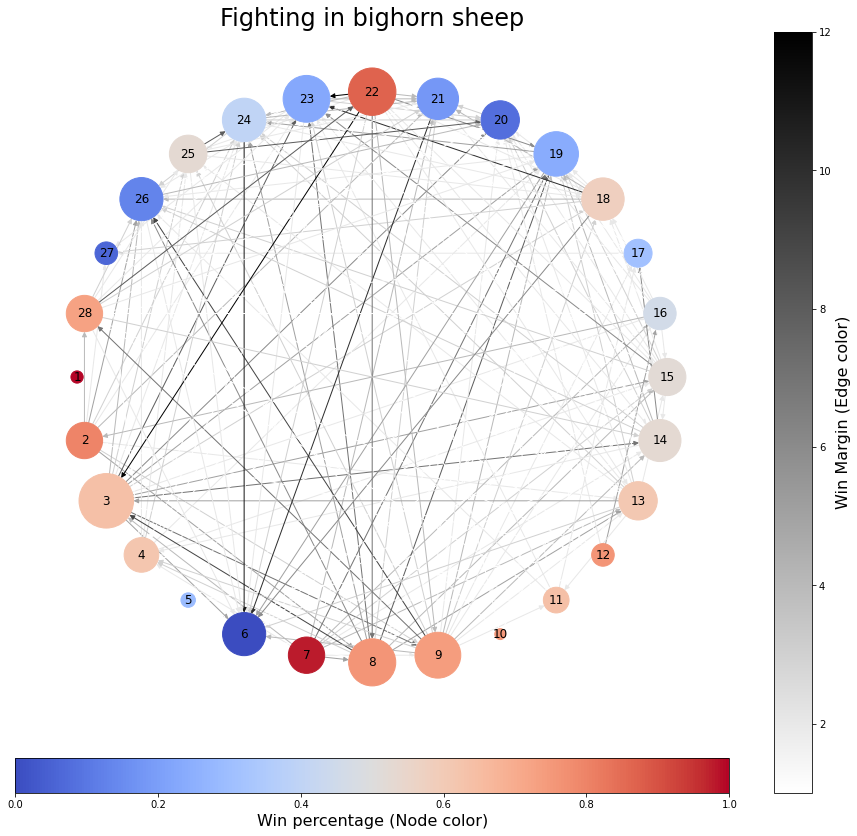

In [15]:
fig, ax = plt.subplots(figsize=(16, 14))

plt.title('Fighting in bighorn sheep', fontsize=24)

edge_color_win_diff = mpl.colors.Normalize(vmin=min(edge_color), vmax=max(edge_color))
fig.colorbar(cm.ScalarMappable(norm=edge_color_win_diff, cmap=cm.binary)
            ).set_label('Win Margin (Edge color)', fontsize=16)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
fig.add_axes(cax)
node_color_win_pct = mpl.colors.Normalize(vmin=0, vmax=1)
fig.colorbar(cm.ScalarMappable(norm=node_color_win_pct, cmap=cm.coolwarm),
             cax=cax, orientation='horizontal').set_label('Win percentage (Node color)', fontsize=16)

nx.draw_shell(sheeps,
              ax=ax,
              node_color=node_color,
              cmap=cm.coolwarm,
              node_size=node_size,
              font_size=12,
              edge_color=edge_color,
              edge_cmap=cm.binary,
              with_labels=True)

fig.savefig('sheep.png')